In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import itertools as it
import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

In [2]:
# For autotesting
%load_ext autoreload
%autoreload 2

In [3]:
width = 9.5
height = 9.5
plt.rcParams['figure.figsize'] = [width, height]

In [4]:
def generate_gaussians(gaussians):
    return [helper.get_gaussian(*gaussian)[2] for gaussian in gaussians]

In [5]:
size = 200

In [6]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5
gaussian_static = [x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size]

In [7]:
colorschemes = color_schemes.get_colorbrewer_schemes()

In [8]:
color_codes = [color_schemes.get_main_color(i)[-1] for i in colorschemes]

In [9]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]

In [10]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
images_overlapping = []
z_sums = []
gaussians = []
for i in range(1,len(static_gaussian_rep)+1):
    print(static_gaussian_rep[:i])
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:i], colorschemes, useCImplementation=True)
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append((static_gaussian_rep[:i]).copy())

[[-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]


In [11]:
for i in range(1,len(static_gaussian_rep)+1):
    if i != len(static_gaussian_rep)+1:
        static_gaussian_rep[i-1][4] += i/10
        print(static_gaussian_rep[i-1])
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:i], colorschemes, useCImplementation=True)
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append(static_gaussian_rep[:i].copy())

[-10, 10, -10, 10, 0.1, 5, 0, 5, 200]
[-10, 10, -10, 10, 0.2, 5, 0, 5, 200]
[-10, 10, -10, 10, 0.3, 5, 0, 5, 200]
[-10, 10, -10, 10, 0.4, 5, 0, 5, 200]
[-10, 10, -10, 10, 0.5, 5, 0, 5, 200]


In [12]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    if i != len(static_gaussian_rep)+1:
        static_gaussian_rep[i-1][4] += 2*i/10
        print(static_gaussian_rep[i-1])
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:i], colorschemes, useCImplementation=True)
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append(static_gaussian_rep[:i].copy())

[-10, 10, -10, 10, 0.2, 5, 0, 5, 200]
[-10, 10, -10, 10, 0.4, 5, 0, 5, 200]
[-10, 10, -10, 10, 0.6, 5, 0, 5, 200]
[-10, 10, -10, 10, 0.8, 5, 0, 5, 200]
[-10, 10, -10, 10, 1.0, 5, 0, 5, 200]


In [13]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    if i != len(static_gaussian_rep)+1:
        static_gaussian_rep[i-1][4] += 4*(i/10)
        print(static_gaussian_rep[i-1])
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:i], colorschemes, useCImplementation=True)
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append(static_gaussian_rep[:i].copy())

[-10, 10, -10, 10, 0.4, 5, 0, 5, 200]
[-10, 10, -10, 10, 0.8, 5, 0, 5, 200]
[-10, 10, -10, 10, 1.2, 5, 0, 5, 200]
[-10, 10, -10, 10, 1.6, 5, 0, 5, 200]
[-10, 10, -10, 10, 2.0, 5, 0, 5, 200]


In [14]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    if i != len(static_gaussian_rep)+1:
        static_gaussian_rep[i-1][4] += i
        print(static_gaussian_rep[i-1])
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:i], colorschemes, useCImplementation=True)
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append(static_gaussian_rep[:i].copy())

[-10, 10, -10, 10, 1, 5, 0, 5, 200]
[-10, 10, -10, 10, 2, 5, 0, 5, 200]
[-10, 10, -10, 10, 3, 5, 0, 5, 200]
[-10, 10, -10, 10, 4, 5, 0, 5, 200]
[-10, 10, -10, 10, 5, 5, 0, 5, 200]


In [15]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
images_overlapping_side = []
z_sums_side = []
gaussians_side = []
for i in range(1,len(static_gaussian_rep)+1):
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:i], colorschemes, useCImplementation=True)
    images_overlapping_side.append(image)
    z_sums_side.append(z_sum)
    gaussians_side.append([i.copy() for i in static_gaussian_rep[:i]])

In [16]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    static_gaussian_rep[0][4] = +(i*i)/10
    static_gaussian_rep[0][6] = +(i*i)/10
    static_gaussian_rep[1][4] = -(i*i)/10
    static_gaussian_rep[1][6] = -(i*i)/10
    static_gaussian_rep[2][4] = +(i*i)/10
    static_gaussian_rep[2][6] = -(i*i)/10
    static_gaussian_rep[3][4] = -(i*i)/10
    static_gaussian_rep[3][6] = +(i*i)/10
    print(static_gaussian_rep[:4])
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:4], colorschemes, useCImplementation=True)
    images_overlapping_side.append(image)
    z_sums_side.append(z_sum)
    gaussians_side.append([i.copy() for i in static_gaussian_rep[:4]])

[[-10, 10, -10, 10, 0.1, 5, 0.1, 5, 200], [-10, 10, -10, 10, -0.1, 5, -0.1, 5, 200], [-10, 10, -10, 10, 0.1, 5, -0.1, 5, 200], [-10, 10, -10, 10, -0.1, 5, 0.1, 5, 200]]
[[-10, 10, -10, 10, 0.4, 5, 0.4, 5, 200], [-10, 10, -10, 10, -0.4, 5, -0.4, 5, 200], [-10, 10, -10, 10, 0.4, 5, -0.4, 5, 200], [-10, 10, -10, 10, -0.4, 5, 0.4, 5, 200]]
[[-10, 10, -10, 10, 0.9, 5, 0.9, 5, 200], [-10, 10, -10, 10, -0.9, 5, -0.9, 5, 200], [-10, 10, -10, 10, 0.9, 5, -0.9, 5, 200], [-10, 10, -10, 10, -0.9, 5, 0.9, 5, 200]]
[[-10, 10, -10, 10, 1.6, 5, 1.6, 5, 200], [-10, 10, -10, 10, -1.6, 5, -1.6, 5, 200], [-10, 10, -10, 10, 1.6, 5, -1.6, 5, 200], [-10, 10, -10, 10, -1.6, 5, 1.6, 5, 200]]
[[-10, 10, -10, 10, 2.5, 5, 2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, 2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, 2.5, 5, 200]]


In [17]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    static_gaussian_rep[1][4] = +(i*i)/10
    static_gaussian_rep[1][6] = +(i*i)/10
    static_gaussian_rep[2][4] = -(i*i)/10
    static_gaussian_rep[2][6] = -(i*i)/10
    static_gaussian_rep[3][4] = +(i*i)/10
    static_gaussian_rep[3][6] = -(i*i)/10
    static_gaussian_rep[4][4] = -(i*i)/10
    static_gaussian_rep[4][6] = +(i*i)/10
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:5], colorschemes, useCImplementation=True)
    images_overlapping_side.append(image)
    z_sums_side.append(z_sum)
    gaussians_side.append([i.copy() for i in static_gaussian_rep[:5]])

[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 0.1, 5, 0.1, 5, 200], [-10, 10, -10, 10, -0.1, 5, -0.1, 5, 200], [-10, 10, -10, 10, 0.1, 5, -0.1, 5, 200], [-10, 10, -10, 10, -0.1, 5, 0.1, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 0.4, 5, 0.4, 5, 200], [-10, 10, -10, 10, -0.4, 5, -0.4, 5, 200], [-10, 10, -10, 10, 0.4, 5, -0.4, 5, 200], [-10, 10, -10, 10, -0.4, 5, 0.4, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 0.9, 5, 0.9, 5, 200], [-10, 10, -10, 10, -0.9, 5, -0.9, 5, 200], [-10, 10, -10, 10, 0.9, 5, -0.9, 5, 200], [-10, 10, -10, 10, -0.9, 5, 0.9, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 1.6, 5, 1.6, 5, 200], [-10, 10, -10, 10, -1.6, 5, -1.6, 5, 200], [-10, 10, -10, 10, 1.6, 5, -1.6, 5, 200], [-10, 10, -10, 10, -1.6, 5, 1.6, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, 2.5, 5, 2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, 2.5, 5, -2.5, 5, 200], [-10, 10, -1

In [18]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    if i == 1:
        static_gaussian_rep[0][5] = 1 
        static_gaussian_rep[0][7] = 1
    else:
        static_gaussian_rep[0][5] = i * 2
        static_gaussian_rep[0][7] = i * 2
    static_gaussian_rep[1][4] = +0.4
    static_gaussian_rep[1][6] = +0.4
    static_gaussian_rep[2][4] = -0.4
    static_gaussian_rep[2][6] = -0.4
    static_gaussian_rep[3][4] = +0.4
    static_gaussian_rep[3][6] = -0.4
    static_gaussian_rep[4][4] = -0.4
    static_gaussian_rep[4][6] = +0.4
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:5], colorschemes, useCImplementation=True)
    images_overlapping_side.append(image)
    z_sums_side.append(z_sum)
    gaussians_side.append([i.copy() for i in static_gaussian_rep[:5]])

[[-10, 10, -10, 10, 0, 1, 0, 1, 200], [-10, 10, -10, 10, 0.4, 5, 0.4, 5, 200], [-10, 10, -10, 10, -0.4, 5, -0.4, 5, 200], [-10, 10, -10, 10, 0.4, 5, -0.4, 5, 200], [-10, 10, -10, 10, -0.4, 5, 0.4, 5, 200]]
[[-10, 10, -10, 10, 0, 4, 0, 4, 200], [-10, 10, -10, 10, 0.4, 5, 0.4, 5, 200], [-10, 10, -10, 10, -0.4, 5, -0.4, 5, 200], [-10, 10, -10, 10, 0.4, 5, -0.4, 5, 200], [-10, 10, -10, 10, -0.4, 5, 0.4, 5, 200]]
[[-10, 10, -10, 10, 0, 6, 0, 6, 200], [-10, 10, -10, 10, 0.4, 5, 0.4, 5, 200], [-10, 10, -10, 10, -0.4, 5, -0.4, 5, 200], [-10, 10, -10, 10, 0.4, 5, -0.4, 5, 200], [-10, 10, -10, 10, -0.4, 5, 0.4, 5, 200]]
[[-10, 10, -10, 10, 0, 8, 0, 8, 200], [-10, 10, -10, 10, 0.4, 5, 0.4, 5, 200], [-10, 10, -10, 10, -0.4, 5, -0.4, 5, 200], [-10, 10, -10, 10, 0.4, 5, -0.4, 5, 200], [-10, 10, -10, 10, -0.4, 5, 0.4, 5, 200]]
[[-10, 10, -10, 10, 0, 10, 0, 10, 200], [-10, 10, -10, 10, 0.4, 5, 0.4, 5, 200], [-10, 10, -10, 10, -0.4, 5, -0.4, 5, 200], [-10, 10, -10, 10, 0.4, 5, -0.4, 5, 200], [-10, 10, 

In [19]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    if i == 1:
        static_gaussian_rep[0][5] = 1 
        static_gaussian_rep[0][7] = 1
    else:
        static_gaussian_rep[0][5] = i * 2
        static_gaussian_rep[0][7] = i * 2
    static_gaussian_rep[1][4] = +0.9
    static_gaussian_rep[1][6] = +0.9
    static_gaussian_rep[2][4] = -0.9
    static_gaussian_rep[2][6] = -0.9
    static_gaussian_rep[3][4] = +0.9
    static_gaussian_rep[3][6] = -0.9
    static_gaussian_rep[4][4] = -0.9
    static_gaussian_rep[4][6] = +0.9
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:5], colorschemes, useCImplementation=True)
    images_overlapping_side.append(image)
    z_sums_side.append(z_sum)
    gaussians_side.append([i.copy() for i in static_gaussian_rep[:5]])

[[-10, 10, -10, 10, 0, 1, 0, 1, 200], [-10, 10, -10, 10, 0.9, 5, 0.9, 5, 200], [-10, 10, -10, 10, -0.9, 5, -0.9, 5, 200], [-10, 10, -10, 10, 0.9, 5, -0.9, 5, 200], [-10, 10, -10, 10, -0.9, 5, 0.9, 5, 200]]
[[-10, 10, -10, 10, 0, 4, 0, 4, 200], [-10, 10, -10, 10, 0.9, 5, 0.9, 5, 200], [-10, 10, -10, 10, -0.9, 5, -0.9, 5, 200], [-10, 10, -10, 10, 0.9, 5, -0.9, 5, 200], [-10, 10, -10, 10, -0.9, 5, 0.9, 5, 200]]
[[-10, 10, -10, 10, 0, 6, 0, 6, 200], [-10, 10, -10, 10, 0.9, 5, 0.9, 5, 200], [-10, 10, -10, 10, -0.9, 5, -0.9, 5, 200], [-10, 10, -10, 10, 0.9, 5, -0.9, 5, 200], [-10, 10, -10, 10, -0.9, 5, 0.9, 5, 200]]
[[-10, 10, -10, 10, 0, 8, 0, 8, 200], [-10, 10, -10, 10, 0.9, 5, 0.9, 5, 200], [-10, 10, -10, 10, -0.9, 5, -0.9, 5, 200], [-10, 10, -10, 10, 0.9, 5, -0.9, 5, 200], [-10, 10, -10, 10, -0.9, 5, 0.9, 5, 200]]
[[-10, 10, -10, 10, 0, 10, 0, 10, 200], [-10, 10, -10, 10, 0.9, 5, 0.9, 5, 200], [-10, 10, -10, 10, -0.9, 5, -0.9, 5, 200], [-10, 10, -10, 10, 0.9, 5, -0.9, 5, 200], [-10, 10, 

In [20]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    if i == 1:
        static_gaussian_rep[0][5] = 1 
        static_gaussian_rep[0][7] = 1
    else:
        static_gaussian_rep[0][5] = i * 3 
        static_gaussian_rep[0][7] = i * 3
    static_gaussian_rep[1][4] = +2.5
    static_gaussian_rep[1][6] = +2.5
    static_gaussian_rep[2][4] = -2.5
    static_gaussian_rep[2][6] = -2.5
    static_gaussian_rep[3][4] = +2.5
    static_gaussian_rep[3][6] = -2.5
    static_gaussian_rep[4][4] = -2.5
    static_gaussian_rep[4][6] = +2.5
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:5], colorschemes, useCImplementation=True)
    images_overlapping_side.append(image)
    z_sums_side.append(z_sum)
    gaussians_side.append([i.copy() for i in static_gaussian_rep[:5]])

[[-10, 10, -10, 10, 0, 1, 0, 1, 200], [-10, 10, -10, 10, 2.5, 5, 2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, 2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, 2.5, 5, 200]]
[[-10, 10, -10, 10, 0, 6, 0, 6, 200], [-10, 10, -10, 10, 2.5, 5, 2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, 2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, 2.5, 5, 200]]
[[-10, 10, -10, 10, 0, 9, 0, 9, 200], [-10, 10, -10, 10, 2.5, 5, 2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, 2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, 2.5, 5, 200]]
[[-10, 10, -10, 10, 0, 12, 0, 12, 200], [-10, 10, -10, 10, 2.5, 5, 2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, 2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, 2.5, 5, 200]]
[[-10, 10, -10, 10, 0, 15, 0, 15, 200], [-10, 10, -10, 10, 2.5, 5, 2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, 2.5, 5, -2.5, 5, 200], [-10, 10

Reihe: Erklärung <br>
1: Beispielreihe <br>
2/3/4/5: Es wird immer ein Gaussian hinzugefügt, der sich dann etwas mehr rechts befindet. Ab wann sind die Gaussians zu unterscheiden?


['mu_x', 'variance_x', 'mu_y', 'variance_y']


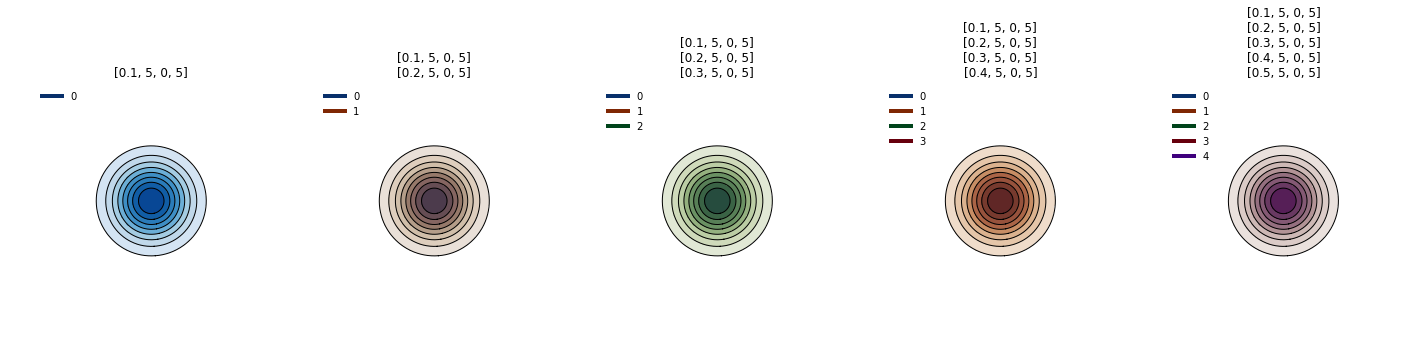

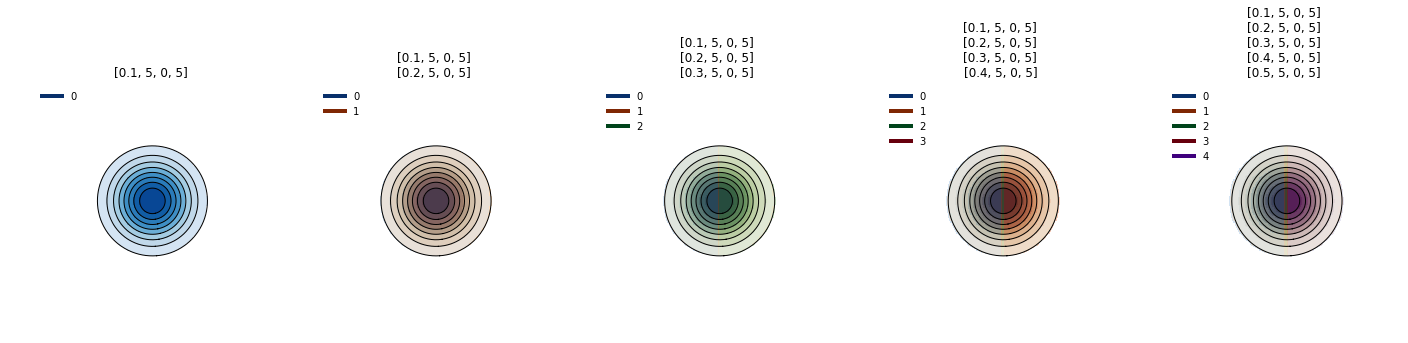

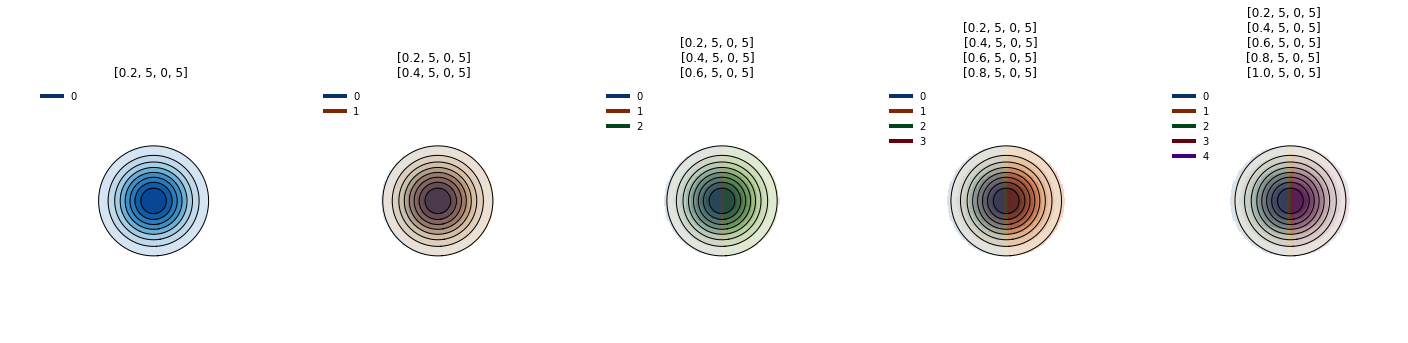

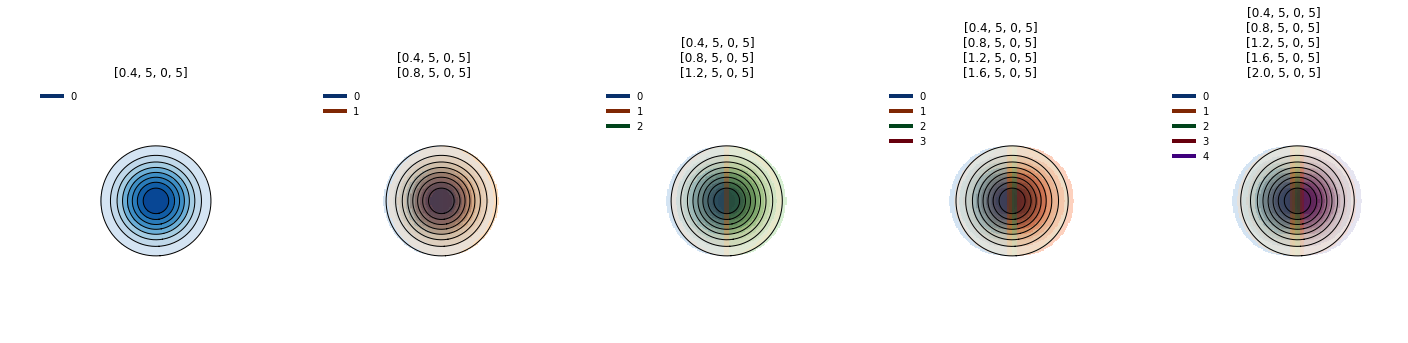

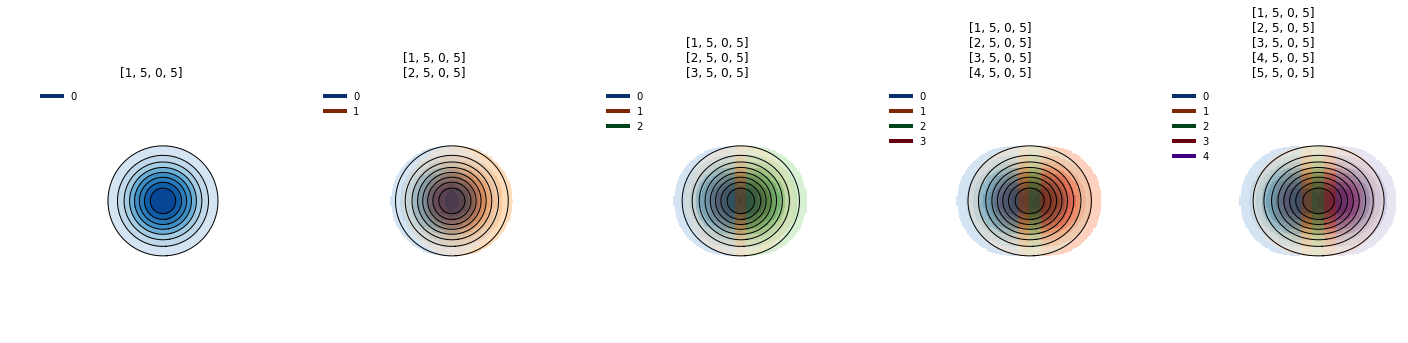

In [21]:
picture_worker.plot_images(images_overlapping, gaussians, z_sums, color_codes)

Reihe: Erklärung <br>
1: Beispielreihe <br>
2: 4 Gaussians bewegen sich voneinander weg. Jeder Gaussian in eine Richtung. Interessant sind hier die Stellen an denen sich die Gaussians überlappen. Es wirkt ein wenig wie der Farbkreis <br>
3: Selbes Scenario wie in der zweiten Reihe, nur diesmal mit einem weiteren Gaussian in der Mitte. Dieser wird nicht verändert Wann taucht er auf? Wie beeinflusst er die anderen Gaussians? <br>
4/5/6: Selbes Scenario wie in der zweiten Reihe, nur diesmal mit einem weiteren Gaussian in der Mitte. Dieser wird in seiner Varianz verändert wobei die X- und Y-Varianz gleich verändert wird. Wann taucht er auf? Wie beeinflusst er die anderen Gaussians? <br>

['mu_x', 'variance_x', 'mu_y', 'variance_y']


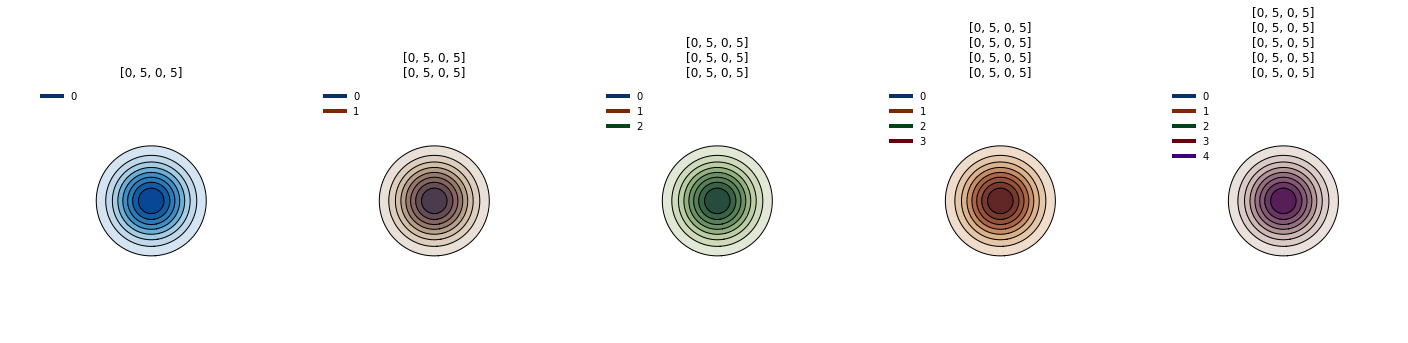

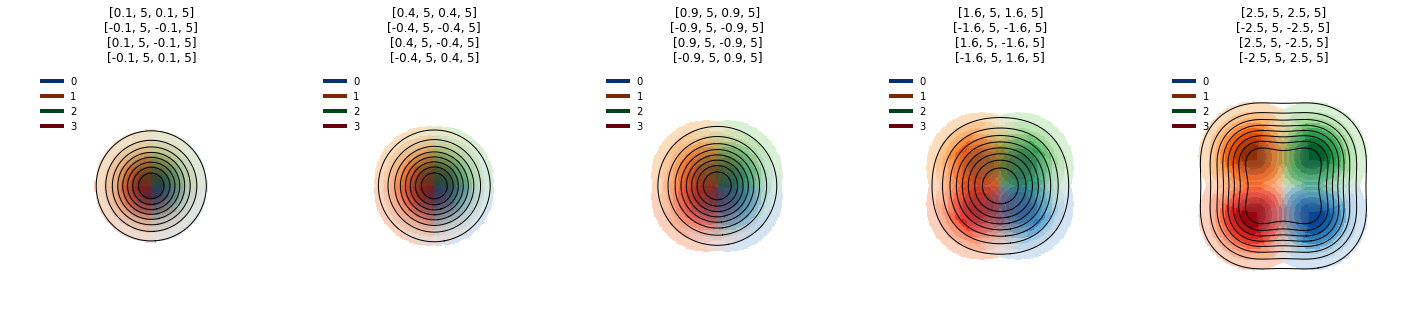

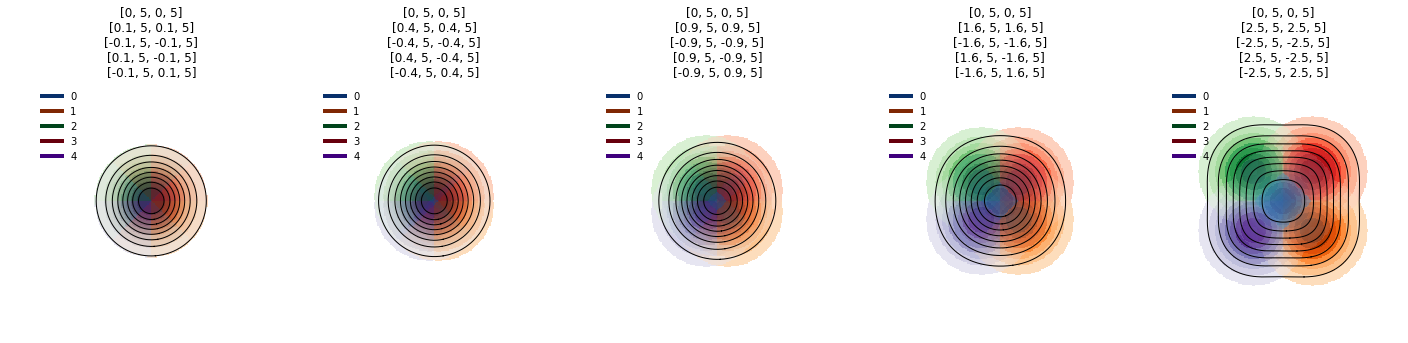

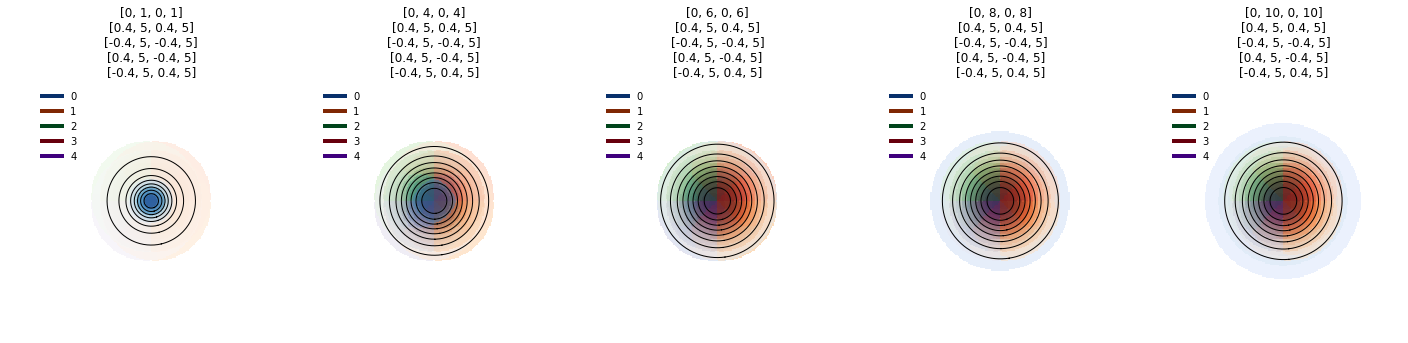

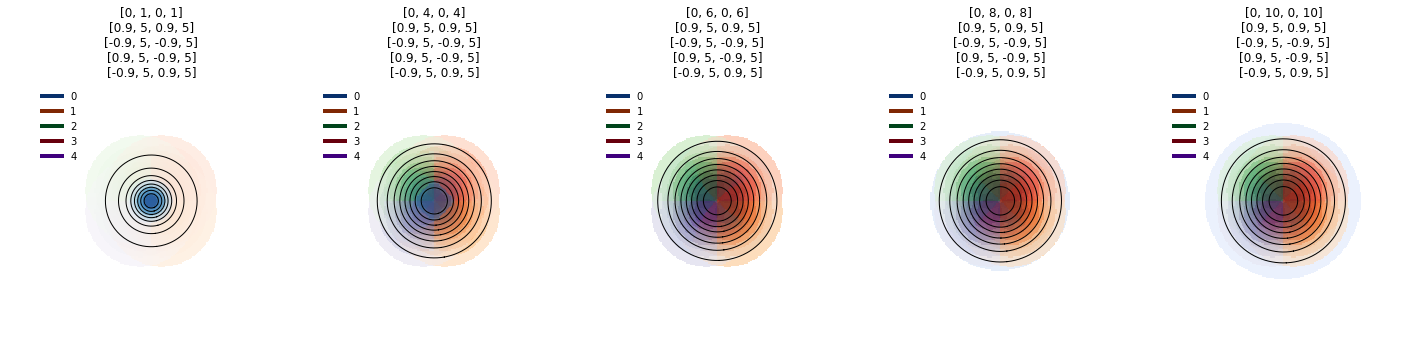

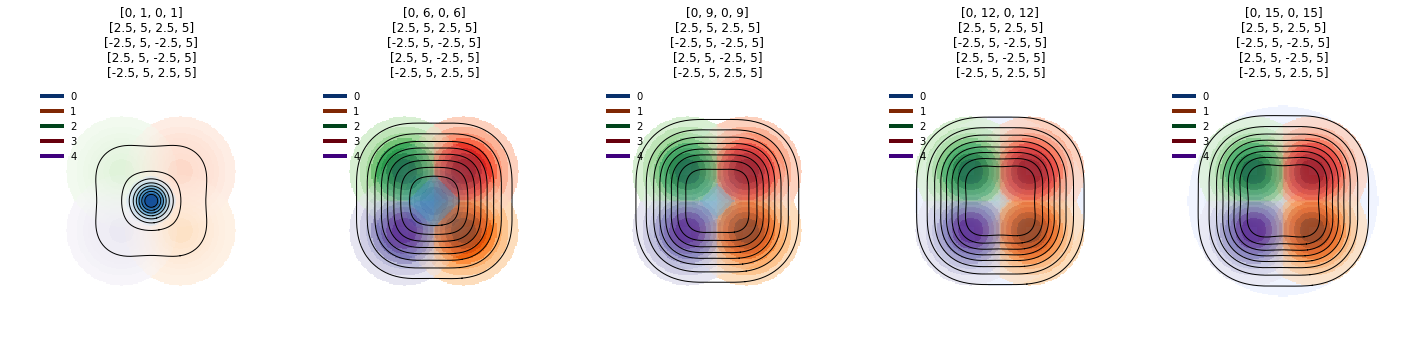

In [22]:
picture_worker.plot_images(images_overlapping_side, gaussians_side, z_sums_side, color_codes)